# Install dependencies

In [1]:

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

# assign datapoints

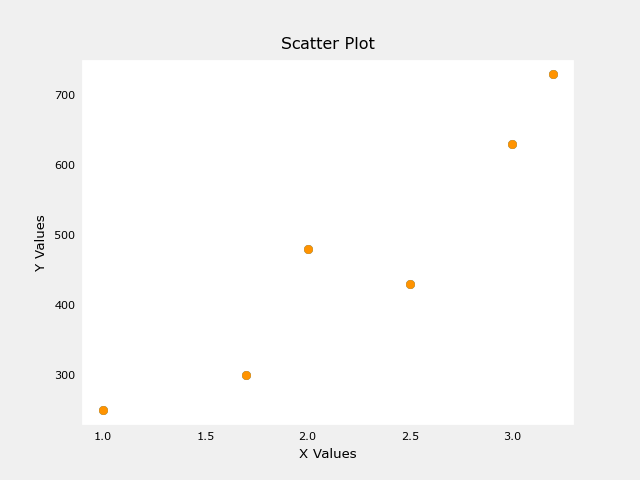

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480, 430, 630, 730])

plt.scatter(x, y)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot')
plt.show()


# Compute Cost

In [3]:
def compute_cost(x, y, w, b):
    """
    Compute the cost of a function for linear regression.
    
    Args:
        x (ndarray(m,)): Data, m examples
        y(ndarray(m)): target values
        w,b (scalar) : model parameters

    Returns:
        total_cost(float): the cost of the function
    """
    # number of examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        # Use the formula for the cost of a linear function
        f_wb = w * x[i] + b
        # Introduction of the cost function 
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1/(2 * m)) * cost_sum

    return total_cost

In [74]:
from mpl_toolkits.mplot3d import Axes3D
# Define range of w and b
w_range = np.linspace(150, 250, 300)
b_range = np.linspace(-100, 200, 400)

# Prepare the grid for storing the costs
costs = np.zeros((len(w_range), len(b_range)))
# Compute the cost for each combination
for i, w in enumerate(w_range):
    for j, b in enumerate(b_range):
        costs[i, j] = compute_cost(x, y, w, b)

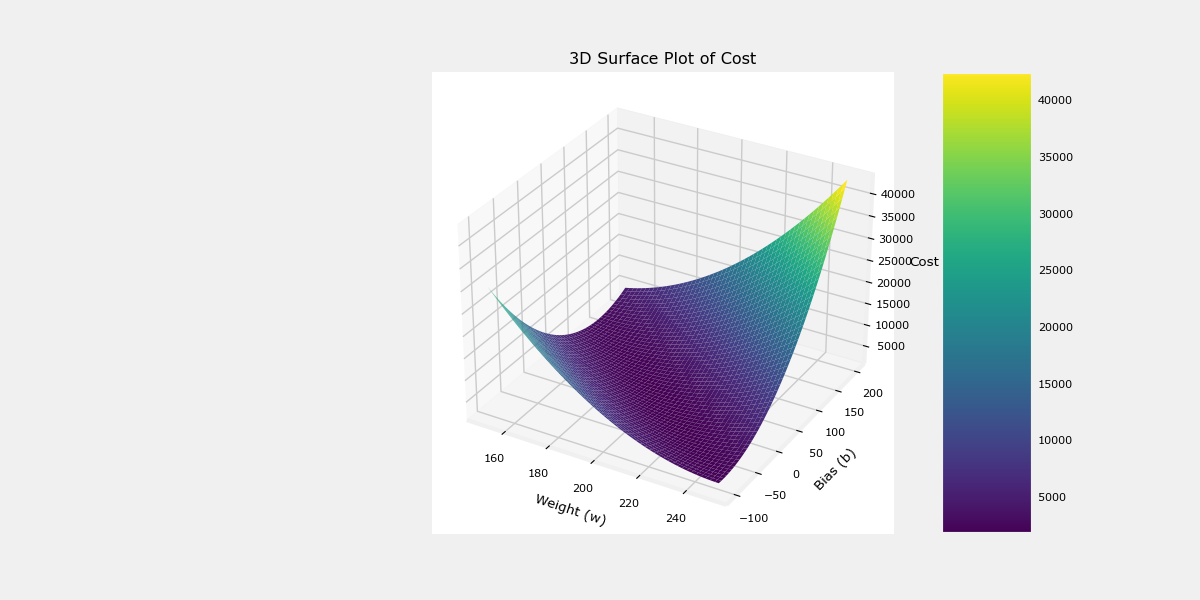

In [77]:
# Create a meshgrid for the parameters w and b
W, B = np.meshgrid(w_range, b_range)

fig = plt.figure(figsize=(12, 6))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(W, B, costs.T, cmap='viridis', edgecolor='none')
# Add labels and title
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost')
fig.colorbar(surf, ax=ax, shrink=1, aspect=5)  # Add a color bar to map the cost values

# Show the plot
plt.show()


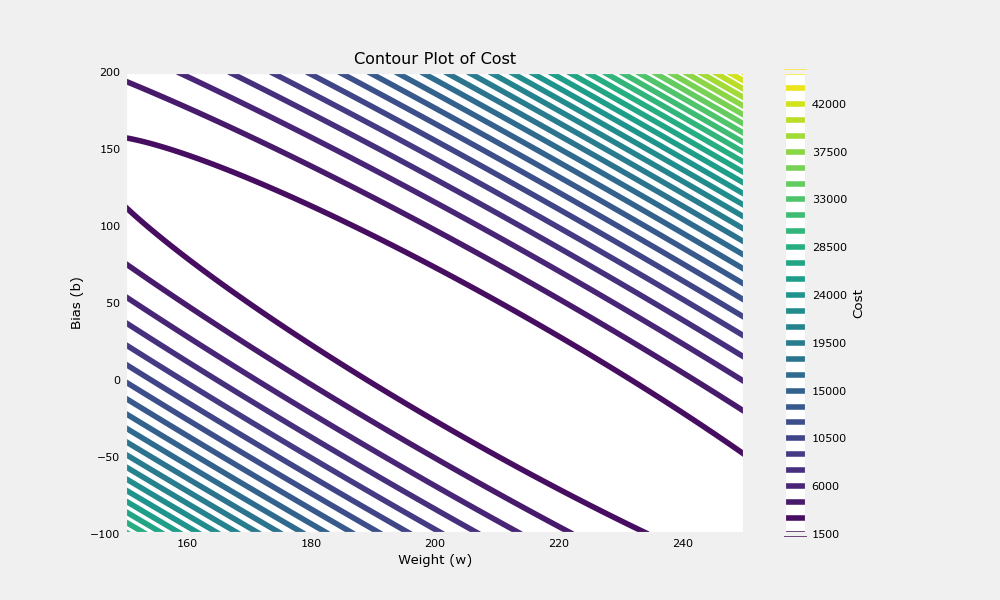

In [76]:
plt.figure(figsize=(10, 6))
plt.contour(W, B, costs.T, levels=40, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Contour Plot of Cost')
plt.colorbar(label='Cost')
plt.show()


Visual intuition indicates the minimum point is in a w of around 200, and a bias of around 25. We can compute the optimal value with the following code:

In [80]:
# Initialize parameters
w = 0.0
b = 0.0

# Learning rate
alpha = 0.01

# Number of iterations
iterations = 1000

# Number of examples
m = len(x)

# Gradient descent
for _ in range(iterations):
    # Predictions
    f_wb = w * x + b
    
    # Cost derivatives
    dw = (1/m) * np.sum((f_wb - y) * x)
    db = (1/m) * np.sum(f_wb - y)

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

    #Compute the cost 
    cost = compute_cost(x, y, w, b)

    # Print the cost (comment to avoid too much output)
    print(f"Iteraction {_+1}: Cost {cost:.4f}")
#Output the final parameters
print(f"Optimal values of w and b are: w = {w:.4f}, b = {b:.4f}")
    

Iteraction 1: Cost 109412.8641
Iteraction 2: Cost 95953.6310
Iteraction 3: Cost 84180.7406
Iteraction 4: Cost 73882.8994
Iteraction 5: Cost 64875.2886
Iteraction 6: Cost 56996.2463
Iteraction 7: Cost 50104.3664
Iteraction 8: Cost 44075.9608
Iteraction 9: Cost 38802.8388
Iteraction 10: Cost 34190.3659
Iteraction 11: Cost 30155.7648
Iteraction 12: Cost 26626.6301
Iteraction 13: Cost 23539.6286
Iteraction 14: Cost 20839.3624
Iteraction 15: Cost 18477.3750
Iteraction 16: Cost 16411.2810
Iteraction 17: Cost 14604.0061
Iteraction 18: Cost 13023.1212
Iteraction 19: Cost 11640.2603
Iteraction 20: Cost 10430.6119
Iteraction 21: Cost 9372.4729
Iteraction 22: Cost 8446.8599
Iteraction 23: Cost 7637.1678
Iteraction 24: Cost 6928.8723
Iteraction 25: Cost 6309.2686
Iteraction 26: Cost 5767.2442
Iteraction 27: Cost 5293.0787
Iteraction 28: Cost 4878.2696
Iteraction 29: Cost 4515.3800
Iteraction 30: Cost 4197.9044
Iteraction 31: Cost 3920.1529
Iteraction 32: Cost 3677.1481
Iteraction 33: Cost 3464.536